# Model Performance: Classification

Recall that after you train an ML model on past data, you can use that model to make predictions on new or previously unseen data. But how do you know if that model is useful?  In ML, when you hear the phrase "model performance", I want you to think about evaluating the quality of model predictions, commonly referred to as its **forecast skill** or **prediction skill**. This lesson focuses on evaluating prediction skill in the context of classification models.

## Classifier Accuracy and Error

Classification is about predicting a label, typically a discrete value. For example, an image of an animal may be classified as being a picture of a "cat" or "dog". There are many ways to measure the prediction skill of a classification model, but **accuracy** and **error rate** are the de facto standard.

### Accuracy
Accuracy is the ratio of the correct predictions to the total number of predictions made.
* Accuracy = Correct Predictions / Total Predictions

90% and above for the accuracy of a predictive model is considered to be good, and it is common practice to aim for that level. 

### Error Rate
You can also summarize model performance in terms of the error rate.
* Error Rate = Incorrect Predictions / Total Predictions

Accuracy and error rates are complements of each other and therefore you can calculate one from the other as follows:
* Accuracy = 1 - Error Rate
* Error Rate = 1 - Accuracy

Consider a classifier that labels pictures as either cats or dogs and that, when tested on 12 pictures (8 cats and 4 dogs), produces the following results:
* 9 Correct Predictions   = (9/12) = 0.75 
* 3 Incorrect Predictions = (3/12) = 0.25

Knowing that the classifier has an accuracy of 0.75 or 75%, does not provide any insight into where the classifier is not performing well. 

Is it more mistaking cats for dogs, or dogs for cats? or is it about the same? 

This is where a **confusion matrix** may prove useful. 

### Confusion Matrix

<img style="float: right; margin: 15px 15px 15px 15px;" src="img/confusion_matrix.png" width="200">

A confusion matrix allows you to easily visualize classification performance.  

In this confusion matrix, of the 8 cat pictures, the model predicted that 2 were dogs, and of the 4 dog pictures, it predicted that 1 was a cat. All correct predictions are located in the diagonal of the table (highlighted in bold), so it is easy to visually inspect the table for prediction errors, as they are represented by values outside the diagonal. By examining the confusing matrix during development, you can see where the model may be confusing two or more classes.

## Hands-On with Classification Metrics: First Look

Scikit-learn is a free ML library for the Python programming language. It has 3 different programming interfaces for evaluating the quality of a model’s predictions:

* Estimator Score Method
* Scoring Parameter
* Metrics Functions

In this interactive demonstration, you'll get experience using the scikit-learn metrics functions to measure the prediction skill of a binary classifier that distinguishes cats and dogs. 

First start by importing the scikit-learn metrics module: 

In [1]:
from sklearn import metrics

Assume that the actual and predicted values from the example are defined as follows, where cats belong to the class 0 and dogs belong to the class 1.

In [2]:
actual_values = [0,0,0,0,0,0,0,0,1,1,1,1]
predictions =   [1,1,0,0,0,0,0,0,1,1,1,0]

Now you can use the metrics functions to calculate the accuracy and print the confusion matrix.

In [3]:
print(f'Accuracy: {metrics.accuracy_score(actual_values, predictions) * 100} % ')

print(f'Confusion Matrix:')

print(metrics.confusion_matrix(actual_values, predictions))

Accuracy: 75.0 % 
Confusion Matrix:
[[6 2]
 [1 3]]


## Classifier Precision, Recall, and F-Measure

As a performance measure, classification accuracy has its limitations. One example where accuracy may be an inadequate performance measure is in the presence of class imbalance. For example, imagine a situation where a dataset of cat and dog images contains a large number of cat examples (majority class) and a small number of dog examples (minority class). On such a dataset, even unskillful models model may achieve high accuracy if the large number of examples from the majority class overwhelms those in the minority class.  

An alternative to using classification accuracy is to use precision and recall metrics. 

However, prior to getting into precision and recall, it is important to dive deeper into the confusion matrix as it provides insight into both the performance of the model and the types of errors being made.

### Confusion Matrix: Reloaded

<img style="float: right; margin: 15px 15px 15px 15px;" src="img/confusion_matrix_reloaded.png" width="200">

The results summary displayed in the confusion matrix consists of true predictions and false predictions.

True Predictions: 
  * TP: True Positives. 
    - Model predicted Yes, and actual value is Yes.
  * TN: True Negatives. 
    - Model predicted No, and actual value is no.
    
False Predictions: 
  * FP: False Positives. 
    - Model predicted Yes, but actual value is No.
  * FN: False Negatives. 
    - Model predicted No, but actual value is Yes.


The **precision** and **recall** metrics are defined using the four terms (TP, TN, FP, and FN) in the confusion matrix.

### Precision

Precision quantifies the number of correct positive predictions made. It answers the question: When the model predicts yes, how often is it right? It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.

* Precision = True Positives / (True Positives + False Positives)

### Recall

Recall quantifies the number of correct positive predictions made out of all of the positive predictions that could have been made. It answers the question: What percentage of the actual positives were identified? Therefore, unlike precision, recall provides an indication of missed positive predictions. It is calculated as the number of true positives divided by the total number of true positives and false negatives.

* Recall = True Positives / (True Positives + False Negatives)

A predictive model with high recall and low precision returns many results, but most of its predicted labels are incorrect. On the other hand, a predictive model with high precision and low recall returns very few results, but most of its predicted labels are correct. The ideal predictive model has high precision and high recall, returning many results with most of its results labeled correctly.

### F-Measure

Precision and recall can be used to compute the **F-Measure** &mdash; a single metric that captures both properties. The traditional F measure is calculated as the harmonic mean of the two fractions.

* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

It is sometimes called the **F-Score** or **F1-Score** and is perhaps the most commonly used metric for imbalanced classification problems.

## Hands-On with Classification Metrics: Deep Dive

The following code example demonstrates how precision, recall and the f1 score can be computed individually using scikit-learn.

In [4]:
#import libraries
from sklearn import metrics

#model prediction results
actual_values = [0,0,0,0,0,0,0,0,1,1,1,1]
predictions =   [1,1,0,0,0,0,0,0,1,1,1,0]

#precision
print(f'Precision Score is: {metrics.precision_score(actual_values, predictions)}')

#recall
print(f'Recall Score is: {metrics.recall_score(actual_values, predictions)}')

#f1 score
print('F1 Score:', metrics.f1_score(actual_values, predictions))

Precision Score is: 0.6
Recall Score is: 0.75
F1 Score: 0.6666666666666665


### Classification Report

Alternatively, instead of printing out individual metrics, you can view a full classification report using the scikit-learn `classification_report` function, which includes the accuracy, precision, recall and f-score all in one table.

In [5]:
#classification report
print(metrics.classification_report(actual_values, predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.60      0.75      0.67         4

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



### Exercise: Report on the Performance of a Spam Detection Classifier

For this exercise, you'll put everything you've learned so far about modeling actual and predicted values, and measuring classification performance in scikit-learn to the test.

#### Problem Description:
You are tasked with evaluating the performance of an predictive ML model for detecting email spam. 

The model is a binary classifier that distinguishes between email messages that are either **_spam_** or **_not spam_**.

#### Data:

The following table summarizes the performance data for this problem: 
<table align="left" style="border-collapse:collapse;border-spacing:0" class="tg"><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal"></td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Email 1</span></td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Email 2</span></td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 3</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 4</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 5</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 6</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 7</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 8</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 9</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 10</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 11</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Email 12</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Actual Values</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Predictions</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Not Spam<br></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Spam</td></tr></tbody></table>

#### Instructions:
Use the Python programming language, including the scikit-learn metrics library, to compute the following performance metrics, visualizations, and reports.

* Accuracy, Error Rate, Confusion Matrix
* Precision, Recall, F1 Score
* Tabular Classification Performance Report

#### Solution:

In [6]:
# Code your solution here...

## Predicting Probabilities

There may be situations where you want to predict the likelihood that a given observation belongs to each class in a classification problem rather than just trying predict a discrete response.  This is particularly useful for classification problems where there may be significant uncertainty. For example, some animals like leopards, jaguars, and cheetahs are often confused because they have similar appearances. In such cases, knowing the probability values that a given image is each type of "big cat" may be preferred over a direct classification.

<img style="align: center; margin: 15px 15px 15px 15px;" src="img/similaranimals.jpeg" width=40%/>

Another reason for this approach is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities. For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1). Such a threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error.

Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.

### Precision-Recall Curve

In order to adequately evaluate a classifier, it is common to take both precision and recall into consideration. Unfortunately, improving precision typically reduces recall and vice-versa. A precision-recall curve is a diagram that shows the tradeoff between precision and recall. 

To plot a precision-recall curve you can use the scikit-learn function `plot_precision_recall_curve`. 

Up to this point you have been manually specifying model prediction results in an array. However, for this interactive demonstration you'll be going through the actual ML process, which involves:
1. Preparing the training data
2. Implementing the model and fitting it to the training data
3. Using the model to make predictions.

#### Import Required Libraries

In [7]:
# Import Libraries
from math import sqrt
from typing import List
from itertools import combinations

import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

#### Prepare the Training Data

In [11]:
actual_values = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predictions =   [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]

# Load Data
data = pd.read_csv('../data/penguins_size.csv')

data = data.dropna()  ## remove data entries with null values
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)  ## exclude specific rows from data
data = data[data['species'] != 'Chinstrap']  ## select all species that are not Chinstrap

X = data.drop(['species'], axis=1).values
y = data['species']
spicies = {'Adelie': -1, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

# Split Data into Training Set and Test Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### Implement Model and Fit it to Training Data

In [12]:
# Use a Decision Tree Classification Model
dt_model = DecisionTreeClassifier(max_depth=1)

# Fit Model to Training Set
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

#### Use Model to Make Predictions on Test Set

In [13]:
dt_predictions = dt_model.predict(X_test)

#### Plot Precision-Recall Curve

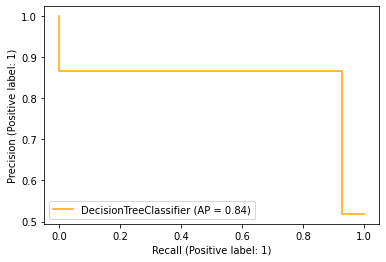

In [14]:
disp = metrics.plot_precision_recall_curve(dt_model, X_test, y_test, color='orange')

The area under the curve represents both high recall and high precision. High scores for both show that the classifier is returning accurate results with a majority of positive results. 

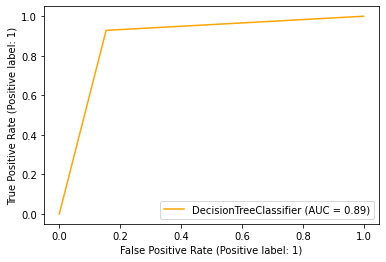

In [15]:
metrics.plot_roc_curve(dt_model, X_test, y_test, color = 'orange')

In [16]:
print('AUC-ROC:', metrics.roc_auc_score(actual_values, predictions))

AUC-ROC: 0.625


### ROC